In [19]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',50)

In [20]:
df = pd.read_csv('mushrooms.csv') # read data
df.head() # first 5 rows


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [21]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [22]:
df.drop('veil-type',axis=1,inplace=True)
df['stalk-root'].replace('?', None, inplace=True)
df['stalk-root'].fillna(df['stalk-root'].mode()[0],inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [24]:
X = df.drop('class',axis=1)
y = df['class']

In [25]:
# Fit and transform the target variable
y = label_encoder.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column
for column in X.columns:
    # Fit and transform the training data column
    X_train[column] = label_encoder.fit_transform(X_train[column])
    # Transform the testing data column
    X_test[column] = label_encoder.transform(X_test[column])


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [29]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [31]:
from xgboost import XGBClassifier

In [32]:
# Define the classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'GradientBoosting Classifier': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier()
}

d:\Users\VINAY PRABHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.9538461538461539
Logistic Regression AUC-ROC score: 0.9834882119333886



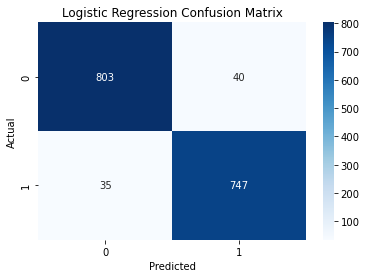

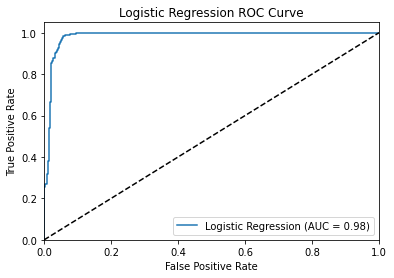

Random Forest accuracy: 1.0
Random Forest AUC-ROC score: 1.0



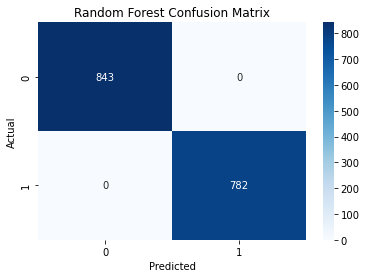

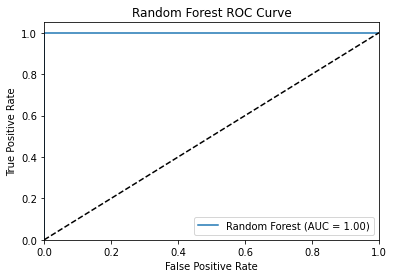

Support Vector Machine accuracy: 0.9932307692307693
Support Vector Machine AUC-ROC score: 0.9998862302154345



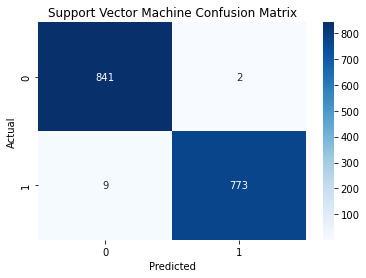

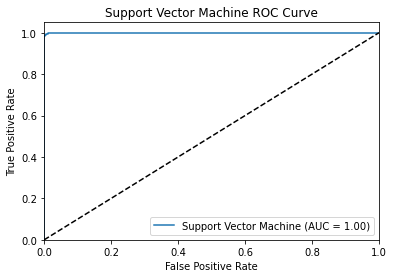

GradientBoosting Classifier accuracy: 1.0
GradientBoosting Classifier AUC-ROC score: 1.0



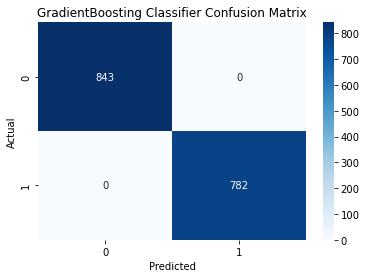

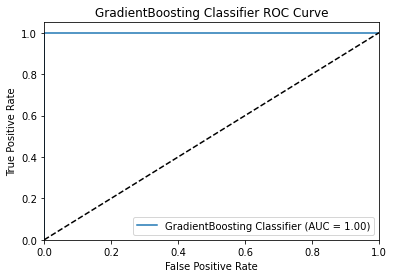

XGB Classifier accuracy: 1.0
XGB Classifier AUC-ROC score: 1.0



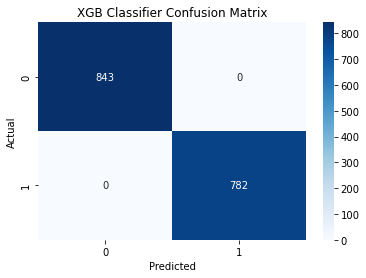

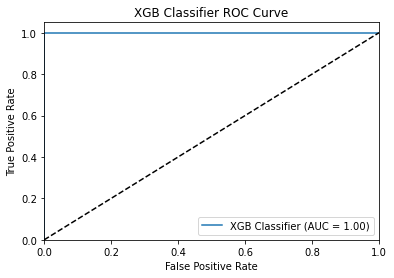

In [33]:
# Train the models and evaluate their performance
accuracy_scores = {}
auc_scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores[model_name] = auc
    
    print(f'{model_name} accuracy: {accuracy}')
    print(f'{model_name} AUC-ROC score: {auc}\n')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'{model_name}_confusion_matrix.jpg')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.savefig(f'{model_name}_roc_curve.jpg')
    plt.show()

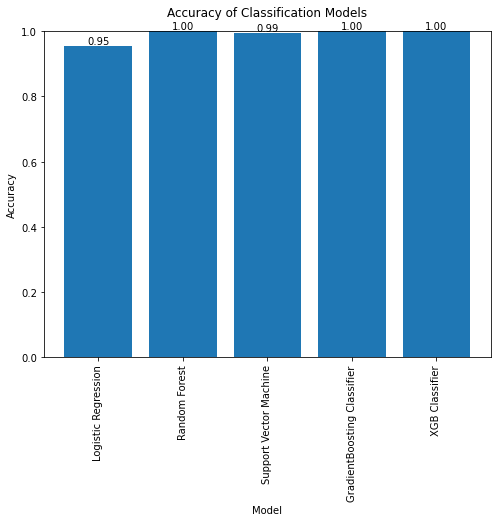

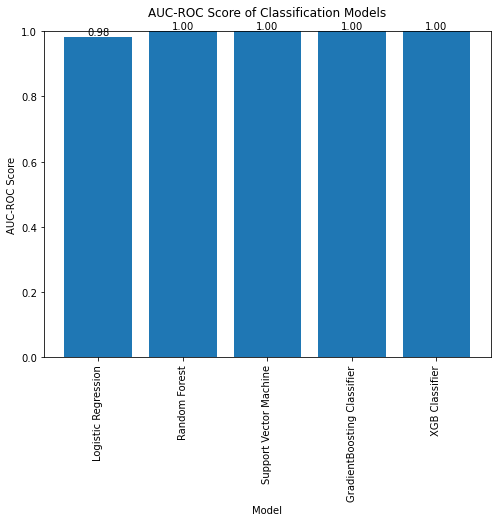

In [34]:
# Plot the accuracy scores
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models',pad=15)

plt.xticks(rotation=90)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
plt.savefig('Accuracy of Classification Models.jpg',format="png", dpi=500, bbox_inches="tight")
plt.show()

# Plot the AUC-ROC scores
plt.figure(figsize=(8, 6))
bars = plt.bar(auc_scores.keys(), auc_scores.values())
plt.xlabel('Model')
plt.ylabel('AUC-ROC Score')
plt.title('AUC-ROC Score of Classification Models',pad=15)
plt.xticks(rotation=90)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
plt.savefig('AUC-ROC Score of Classification Models.jpg',format="png", dpi=500, bbox_inches="tight")
plt.show()
